### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [17]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [18]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [19]:
initial_data.shape[0] == processed_data.shape[0]

True

In [20]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [21]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [22]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [23]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

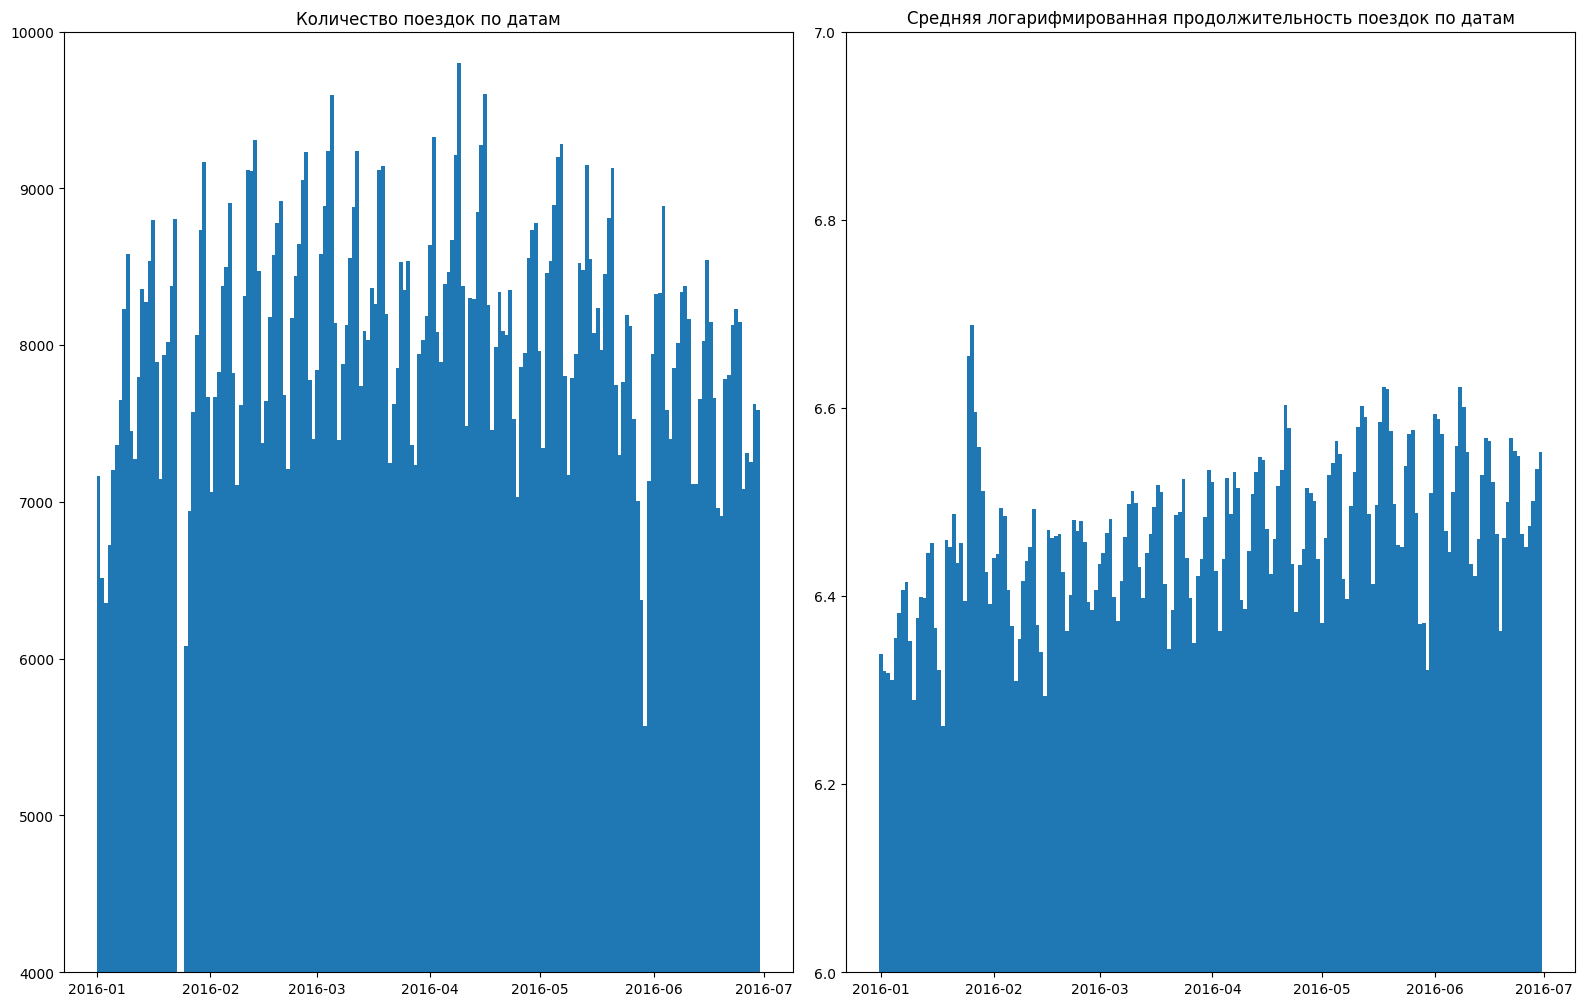

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


<function matplotlib.pyplot.show(close=None, block=None)>

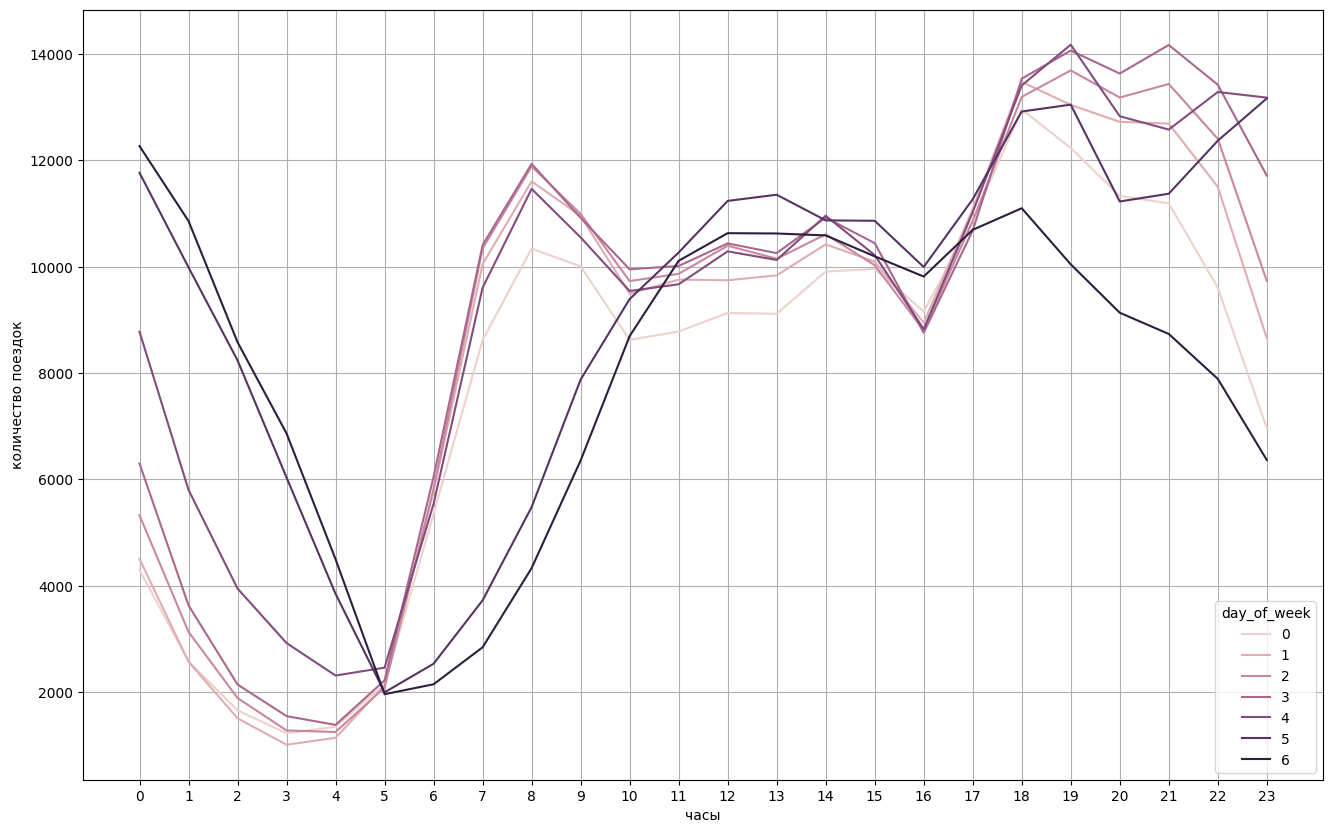

In [25]:
#Количество поездок/Средняя продолжительность поездки vs День недели
t1 = processed_data.reset_index()\
    .groupby(['hour', 'day_of_week'], as_index=False)\
    .aggregate({'id': 'count'})\
    .rename(columns={'id': 'id_count'})
import seaborn 
from matplotlib import pyplot as plt

fig = plt.figure()
fig.set_size_inches(16, 10)

g = seaborn.lineplot(data=t1, x='hour', y='id_count', hue='day_of_week')
plt.xticks(t1.hour.unique())
plt.xlabel('часы')
plt.ylabel('количество поездок')
plt.grid(which='major')
plt.show

In [26]:
t1

,hour,day_of_week,id_count
0,0,0,4299
1,0,1,4506
2,0,2,5327
3,0,3,6299
4,0,4,8779
...,...,...,...
163,23,2,9735
164,23,3,11715
165,23,4,13181
166,23,5,13166


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


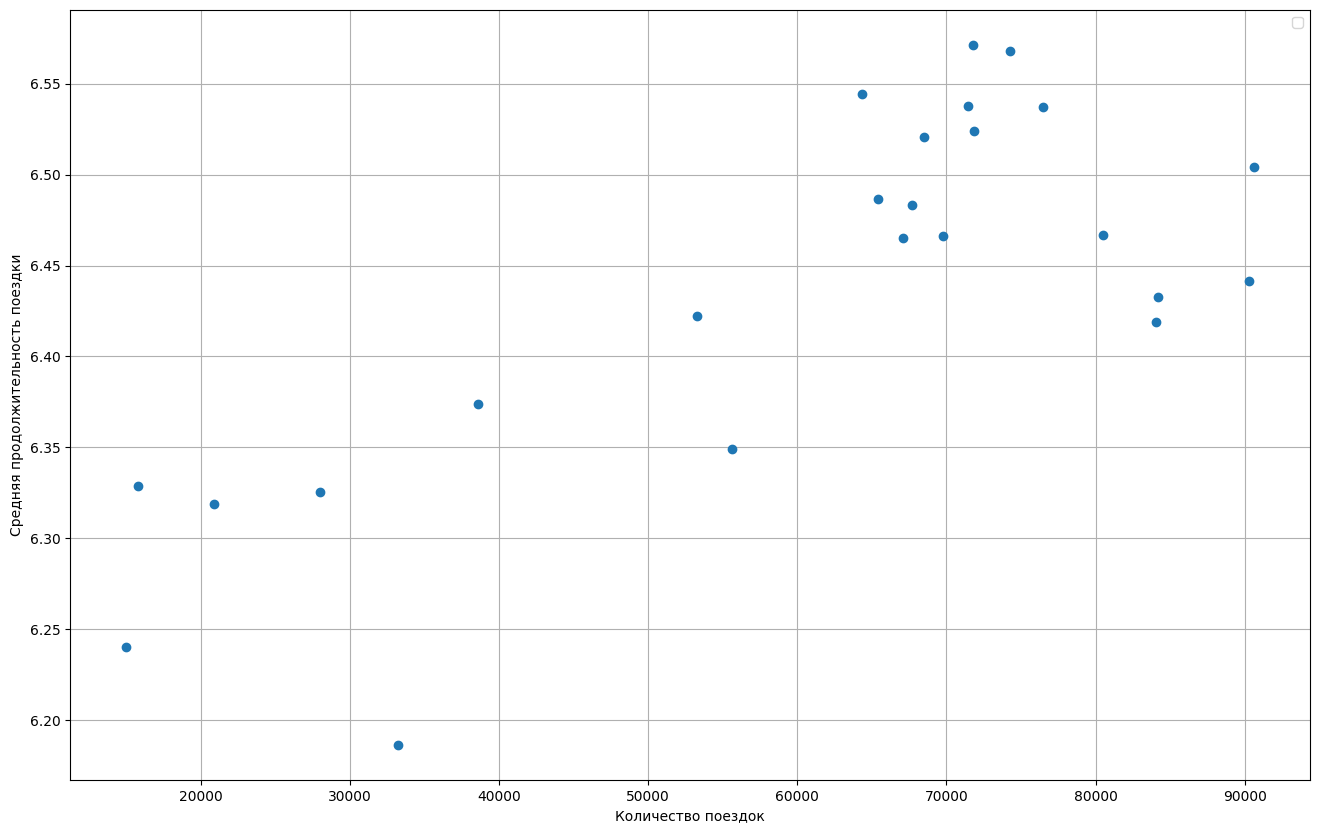

In [27]:
#Количество поездок/Средняя продолжительность поездки vs время суток

t2 = processed_data.reset_index()\
    .groupby(['hour'], as_index=False)\
    .aggregate({'log_trip_duration': 'mean', 'id': 'count'})\
    .rename(columns={'id': 'id_count', 'log_trip_duration': 'log_trip_duration_mean'})

fig = plt.figure()
fig.set_size_inches(16, 10)
plt.plot(t2['id_count'], t2['log_trip_duration_mean'], 'o')
plt.xlabel('Количество поездок')
plt.ylabel('Средняя продолжительность поездки')
plt.grid(which='major')
plt.legend()
plt.show()

In [28]:
t2

,hour,log_trip_duration_mean,id_count
0,0,6.422417,53248
1,1,6.373789,38571
2,2,6.325211,27972
3,3,6.318661,20895
4,4,6.328824,15792
5,5,6.240214,15002
6,6,6.186512,33248
7,7,6.349027,55600
8,8,6.465236,67053
9,9,6.483529,67663


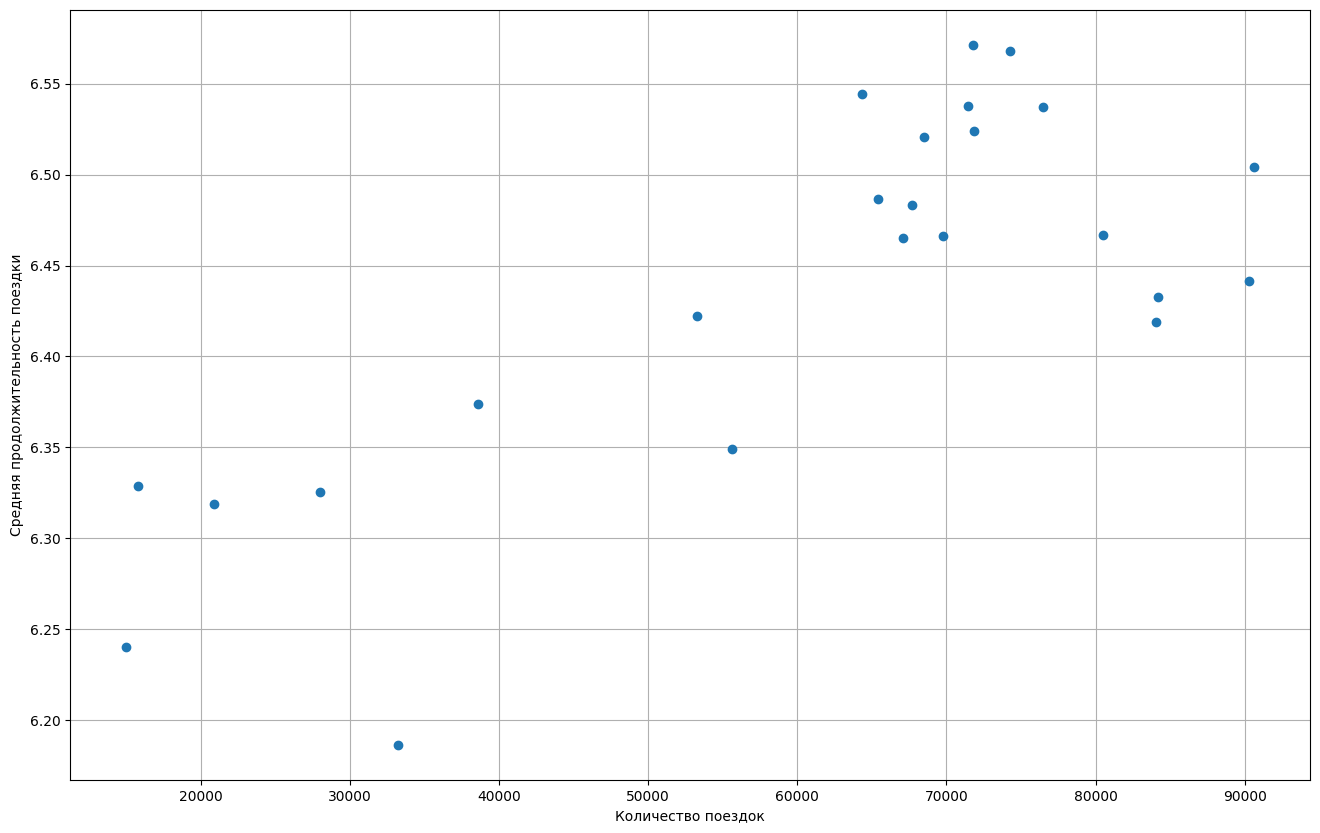

In [29]:
# Средняя продолжительность поездки vs время суток для каждого дня недели 
# (например, нарисовав с разными цветами и, соответственно, легендами)

t2 = processed_data.reset_index()\
    .groupby(['hour'], as_index=False)\
    .aggregate({'log_trip_duration': 'mean', 'id': 'count'})\
    .rename(columns={'id': 'id_count', 'log_trip_duration': 'log_trip_duration_mean'})

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(t2['id_count'], t2['log_trip_duration_mean'], 'o')
plt.xlabel('Количество поездок')
plt.ylabel('Средняя продолжительность поездки')
plt.grid(which='major')
plt.show()

In [31]:
processed_data.groupby('date')[['distance_km', 'day_of_week']].mean()

,distance_km,day_of_week
date,,
2016-01-01,3.824963,4.0
2016-01-02,3.551276,5.0
2016-01-03,3.954787,6.0
2016-01-04,3.536768,0.0
2016-01-05,3.292450,1.0
...,...,...
2016-06-26,3.952856,6.0
2016-06-27,3.602508,0.0
2016-06-28,3.305209,1.0


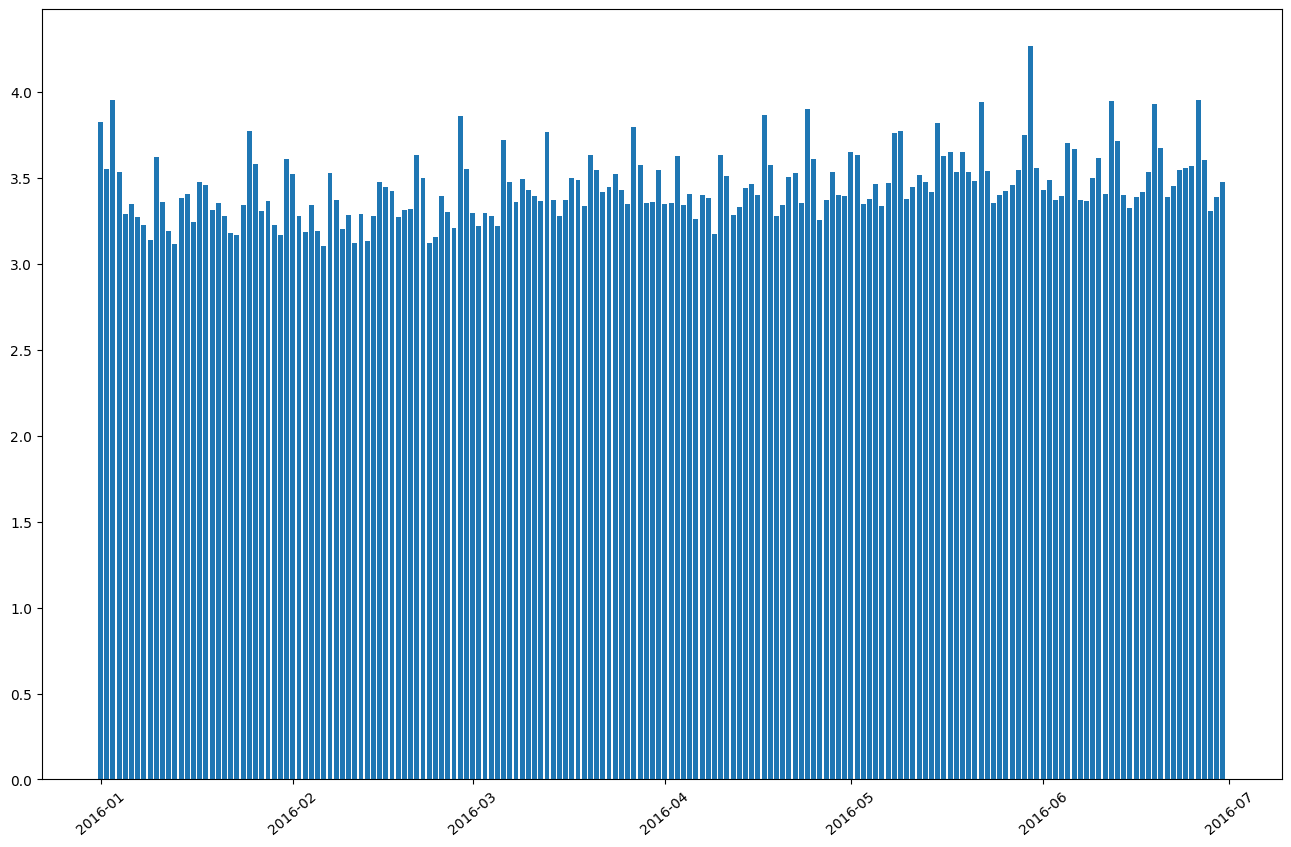

In [32]:
main_category = processed_data.groupby('date')['distance_km'].mean()
main_category = main_category.sort_values()

fig = plt.figure()
fig.set_size_inches(16, 10)

plt.bar(main_category.index, main_category)
plt.xticks(rotation=40)

plt.show()

In [ ]:
# grouped_count = processed_data.groupby(['month', 'day_of_week','hour'], as_index=False).count()[['month', 'hour', 'day_of week', 'log_trip_duration']]
# grouped_mean = processed_data.groupby(['month', 'day_of_week','hour'], as_index=False).mean()[['month', 'hour', 'day_of_week', 'log_trip_duration']] 
# grouped_count = grouped_count.rename(columns={'log_trip_duration':'number_of_rides'})
# merged = grouped_count.merge(grouped_mean.drop('is_weekend', axis=l), left_on=['month', 'hour', 'day_of_week'], right_on=['month', 'hour', 'day_of_week'])

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [33]:
### Создадим первый бинарный признак
group_date = processed_data.groupby('date')['distance_km'].sum().sort_values()
group_date


date
2016-01-23     5218.199465
2016-01-24    11314.100018
2016-01-25    22962.841165
2016-01-02    23125.907308
2016-01-05    23718.812746
                  ...     
2016-04-17    31932.699174
2016-04-15    32145.785419
2016-05-07    32252.478018
2016-05-15    32630.855788
2016-04-16    32674.617619
Name: distance_km, Length: 182, dtype: float64

In [34]:
processed_data.loc[processed_data['date']==pd.Timestamp('2016-01-23'), 'anomaly'] = 1
processed_data['anomaly'] = processed_data['anomaly'].fillna(0)
processed_data['anomaly'] = processed_data['anomaly'].astype(int)
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0
...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,2016-04-08 13:31:04,2016-04-08,4,13,4,0
id1049543,0,930.399753,0,6.056935,6.486161,2016-01-10 07:35:15,2016-01-10,6,7,1,0
id2304944,1,930.399753,0,7.832952,6.639876,2016-04-22 06:57:41,2016-04-22,4,6,4,0


In [35]:
# processed_data['traffic_jam']
# k = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean().sort_values('log_trip_duration', ascending=False).head(10)

In [36]:
selection_bias = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean().sort_values('log_trip_duration', ascending=False).head(10)
selection_bias

,day_of_week,hour,log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [37]:
selec_1 = processed_data[processed_data['day_of_week'].isin(list(set(selection_bias.day_of_week)))]
selec_2 = selec_1[selec_1['hour'].isin(list(set(selection_bias.hour)))]
selec_2

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id1410897,0,930.399753,0,9.951986,7.754482,2016-03-23 14:10:39,2016-03-23,2,14,3,0
id1870624,0,1028.236276,0,1.137724,6.317165,2016-01-05 15:29:54,2016-01-05,1,15,1,0
id3323083,0,1005.458335,0,3.316073,7.081709,2016-05-27 14:26:12,2016-05-27,4,14,5,0
id3720663,0,930.399753,0,2.591236,7.329094,2016-05-10 16:14:56,2016-05-10,1,16,5,0
...,...,...,...,...,...,...,...,...,...,...,...
id0652425,1,930.399753,0,5.448405,7.566828,2016-04-13 16:06:12,2016-04-13,2,16,4,0
id3027038,1,930.399753,0,0.617711,5.472271,2016-05-19 14:46:55,2016-05-19,3,14,5,0
id2376096,1,1053.529749,0,1.226296,6.658011,2016-04-08 13:31:04,2016-04-08,4,13,4,0


In [38]:
processed_data.loc[selec_2.index, 'traffic_jam'] = 1
processed_data['traffic_jam'] = processed_data['traffic_jam'].fillna(0)
processed_data['traffic_jam'] = processed_data['traffic_jam'].astype(int)
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,2016-04-08 13:31:04,2016-04-08,4,13,4,0,1
id1049543,0,930.399753,0,6.056935,6.486161,2016-01-10 07:35:15,2016-01-10,6,7,1,0,0
id2304944,1,930.399753,0,7.832952,6.639876,2016-04-22 06:57:41,2016-04-22,4,6,4,0,0


In [39]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [40]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [41]:
### Делаем OneHotEncoding и конкатим с processed_data

processed_data = pd.concat((processed_data, pd.get_dummies(processed_data['day_of_week'], prefix=('day_of_week'))), axis=1)
processed_data = pd.concat((processed_data, pd.get_dummies(processed_data['hour'], prefix=('hour'))), axis=1)
processed_data = pd.concat((processed_data, pd.get_dummies(processed_data['month'], prefix=('month'))), axis=1)
processed_data = processed_data.drop(['day_of_week'], axis=1)  
processed_data = processed_data.drop(['hour'], axis=1) 
processed_data = processed_data.drop(['month'], axis=1) 
processed_data = processed_data.drop(['day_of_week_0'], axis=1) 
processed_data = processed_data.drop(['month_1'], axis=1) 
processed_data = processed_data.drop(['hour_0'], axis=1) 
processed_data


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
id2377394,0,930.399753,0,1.807119,6.498282,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
id3858529,1,930.399753,0,6.392080,7.661527,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
id3504673,1,930.399753,0,1.487155,6.063785,0,0,False,True,False,...,True,False,False,False,False,False,False,True,False,False
id2181028,1,930.399753,0,1.189925,6.077642,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
id1049543,0,930.399753,0,6.056935,6.486161,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
id2304944,1,930.399753,0,7.832952,6.639876,0,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# processed_data.head(5).to_csv('processed_data1.csv', sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [42]:
x = processed_data['distance_km']
y = processed_data['passenger_count']

pd.concat((x, y), axis=1).corr()

,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [43]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
id2377394,0,930.399753,0,1.807119,6.498282,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
id3858529,1,930.399753,0,6.392080,7.661527,0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
id3504673,1,930.399753,0,1.487155,6.063785,0,0,False,True,False,...,True,False,False,False,False,False,False,True,False,False
id2181028,1,930.399753,0,1.189925,6.077642,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [44]:
x_1 = processed_data.drop(['log_trip_duration'], axis=1) 
y_1 = processed_data['log_trip_duration']

In [47]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

from sklearn.linear_model import LinearRegression

model = LinearRegression()

from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x_1, y_1)


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [48]:
### Перечислите фичи, которые окажутся наиболее желанными
sfs.get_support()


array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [49]:
sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [50]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

x_1 = processed_data[sfs.get_feature_names_out()]
y_1 = processed_data['log_trip_duration']

model = LinearRegression()
model.fit(x_1, y_1)

los_all = np.mean((y_1 - model.predict(x_1))**2)

print (((los_all)).round(3))

0.414
